# Multi-Model Ensemble for Noisy Data Classification

**Dataset used:** Titanic Survival Dataset (real-world, noisy, missing values)

This notebook demonstrates preprocessing, model training, ensemble learning, and evaluation.

## 1. Import Libraries

In [5]:
!pip install numpy pandas matplotlib seaborn scikit-learn jupyter


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for jupyter from https://files.pythonhosted.org/packages/38/64/285f20a31679bf547b75602702f7800e74dbabae36ef324f716c02804753/jupyter-1.1.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/16/2e/86f24451c2d530c88daf997cb8d6ac622c1d40d19f5a031ed68a4b73a374/numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 108.9 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/61.0 kB 108.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 119.1 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python312\\site-packages\\~umpy.libs\\libscipy_openblas64_-9e3e5a4229c1ca39f10dc82bba9e2b2b.dll'
Check the permissions.



In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
## 2. Load Dataset

In [8]:

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Data Preprocessing

In [9]:

data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

X = data.drop('Survived', axis=1)
y = data['Survived']

X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'S':0, 'C':1, 'Q':2})

X[['Age', 'Fare']] = SimpleImputer(strategy='median').fit_transform(X[['Age', 'Fare']])
X[['Embarked']] = SimpleImputer(strategy='most_frequent').fit_transform(X[['Embarked']])


## 4. Train-Test Split

In [10]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 5. Model Training

In [11]:

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
nb = GaussianNB()
svm = SVC(kernel='rbf', C=1.0)

dt.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC()

## 6. Cross Validation

In [12]:

models = {'Decision Tree': dt, 'Naive Bayes': nb, 'SVM': svm}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(name, "CV Accuracy:", scores.mean())


Decision Tree CV Accuracy: 0.8061755146262188
Naive Bayes CV Accuracy: 0.797675563872747
SVM CV Accuracy: 0.6670836206047474


## 7. Ensemble Learning

In [16]:

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)

bagging.fit(X_train, y_train)

boosting = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting.fit(X_train, y_train)


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

## 8. Evaluation


Model: Decision Tree
Accuracy : 0.7989
Precision: 0.8276
Recall   : 0.6486
F1-score : 0.7273


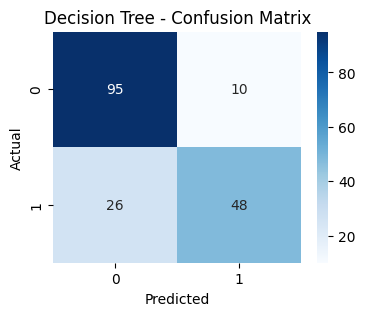


Model: Naive Bayes
Accuracy : 0.7765
Precision: 0.7297
Recall   : 0.7297
F1-score : 0.7297


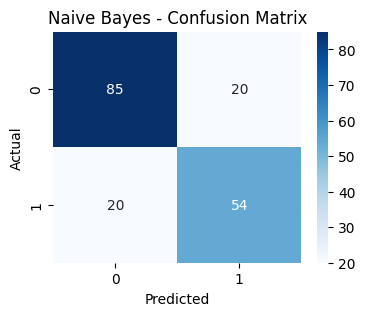


Model: SVM
Accuracy : 0.6536
Precision: 0.7500
Recall   : 0.2432
F1-score : 0.3673


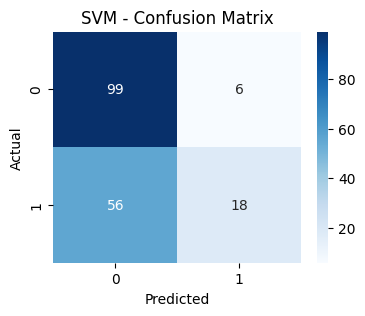


Model: Bagging
Accuracy : 0.7989
Precision: 0.8167
Recall   : 0.6622
F1-score : 0.7313


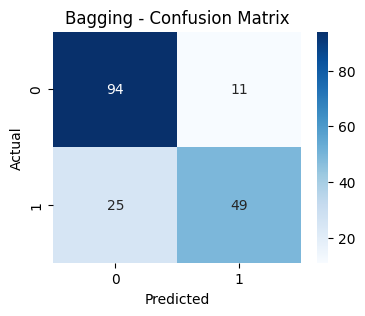


Model: Boosting
Accuracy : 0.8045
Precision: 0.7671
Recall   : 0.7568
F1-score : 0.7619


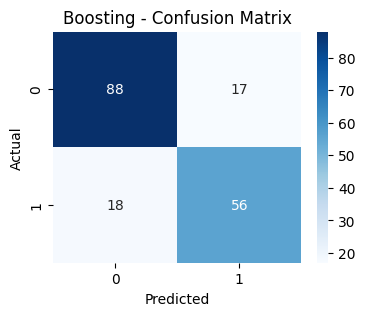

(0.8044692737430168,
 0.7671232876712328,
 0.7567567567567568,
 0.7619047619047619)

In [19]:

def evaluate(model, model_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print metrics
    print(f"\nModel: {model_name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, prec, rec, f1


for name, model in models.items():
    evaluate(model, name)

evaluate(bagging, "Bagging")
evaluate(boosting, "Boosting")


## 9. Confusion Matrix

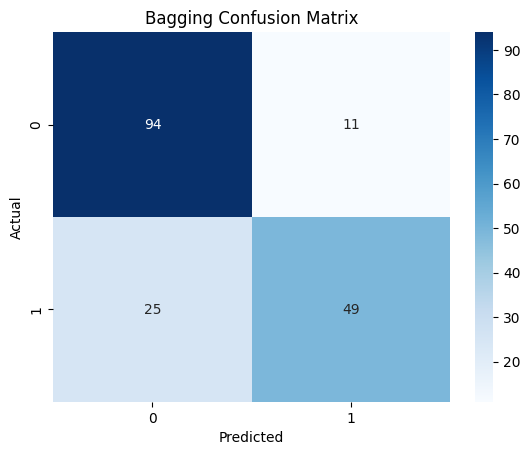

In [18]:

cm = confusion_matrix(y_test, bagging.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Bagging Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 10. Conclusion
- Ensemble learning improves robustness
- Bagging performs best on noisy data
- Proper preprocessing is essential